In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Pandas 시각화
판다스 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- kind : 그래프 종류 지정
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot

matplotlib를 이용해 여러 설정들 가능

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다.

In [53]:
tips = pd.read_csv('data/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [54]:
# 성별: 남성, 여성의 수
a = tips['sex'].value_counts()
a

Male      157
Female     87
Name: sex, dtype: int64

<BarContainer object of 2 artists>

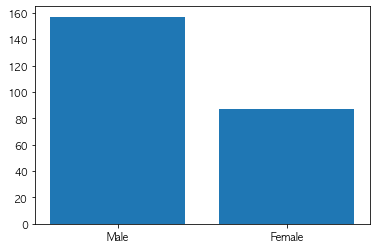

In [55]:
plt.bar(a.index, a)

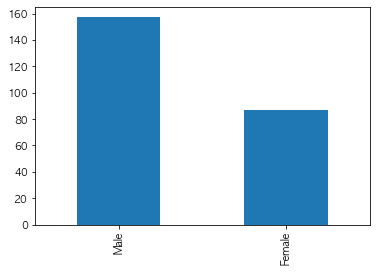

In [56]:
tips['sex'].value_counts().plot(kind = 'bar')
# Series.bar(): index가 x축, value가 y축

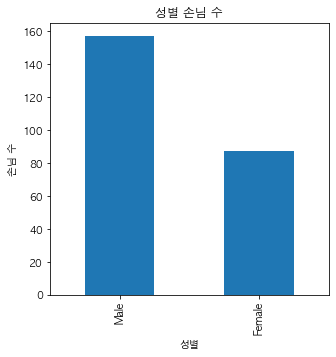

In [57]:
plt.figure(figsize = (5, 5))
tips['sex'].value_counts().plot(kind = 'bar')#, title = '타이틀')
plt.title('성별 손님 수')
plt.xlabel('성별')
plt.ylabel('손님 수')
plt.show()

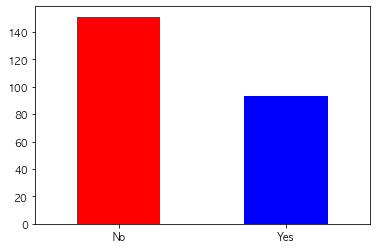

In [58]:
sm = tips['smoker'].value_counts()
sm.plot.bar(color = ['r', 'b'], rot = 0)  # rot를 통해 x축에 표시되는 글씨의 각을 지정할 수 있다.
plt.show()

- 두개의 분류 별로 그리기
    - 여러개의 컬럼일 경우 수평 누적 막대그래프를 그린다.


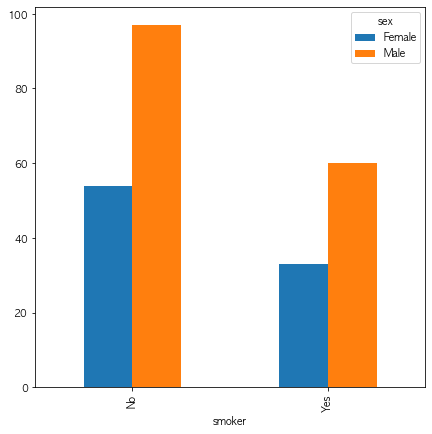

In [62]:
agg_df = tips.pivot_table(index = 'smoker', columns = 'sex', values = 'tip', aggfunc = 'count')
agg_df.plot.bar(figsize = (7, 7))
plt.show()

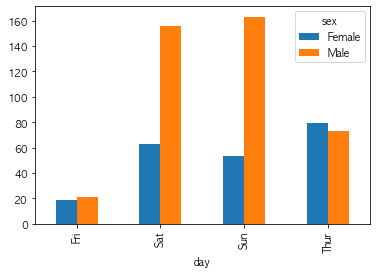

In [12]:
# 요일(day) - 성별(sex) 손님의 총수(size)
# DF의 index: ticks - 1차 그룹, columns - 각 ticks마다 나눠져서 나옴 - 2차 그룹
tips.pivot_table(index = 'day', columns = 'sex', values = 'size', aggfunc = 'sum').plot.bar()

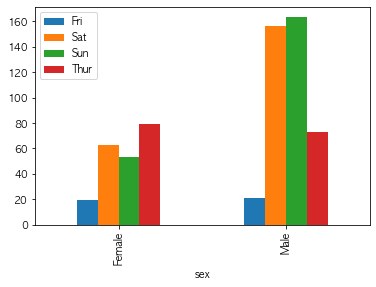

In [13]:
tips.pivot_table(index = 'sex', columns = 'day', values = 'size', aggfunc = 'sum').plot.bar()
plt.legend(loc = 'upper left')
plt.show()

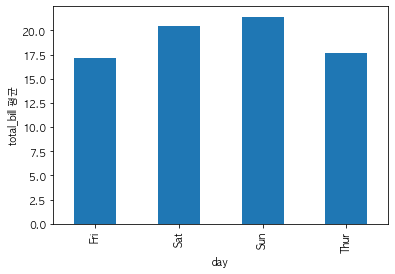

In [14]:
tips.groupby('day')['total_bill'].mean().plot.bar()
plt.ylabel('total_bill 평균')
plt.show()

## 파이차트

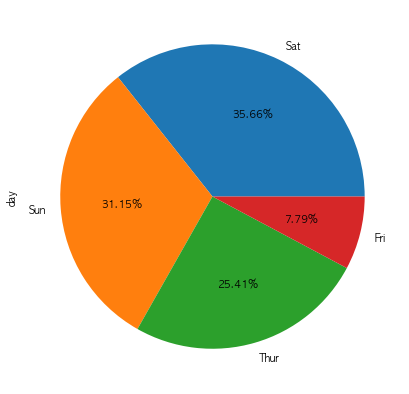

In [15]:
tips['day'].value_counts().plot.pie(figsize = (7, 7), autopct = '%.2f%%')

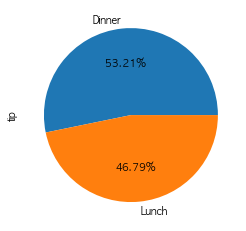

In [16]:
#tips.groupby('time')['tip'].mean()
tips.groupby('time')['tip'].mean().plot(kind = 'pie', autopct = '%.2f%%')

## 히스토그램, KDE(밀도그래프)

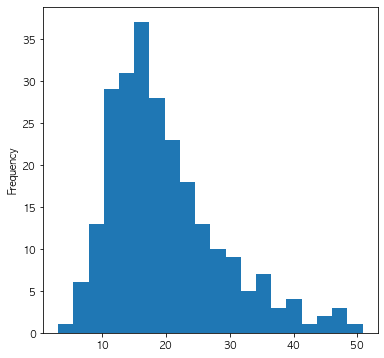

In [17]:
tips['total_bill'].plot.hist(figsize = (6, 6), bins = 20)
plt.show()

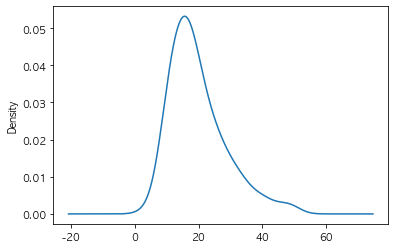

In [18]:
tips['total_bill'].plot.kde()

## Boxplot (상자그래프)

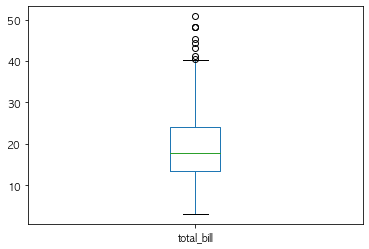

In [19]:
# Series
tips['total_bill'].plot.box()#(whis= 3)
plt.show()

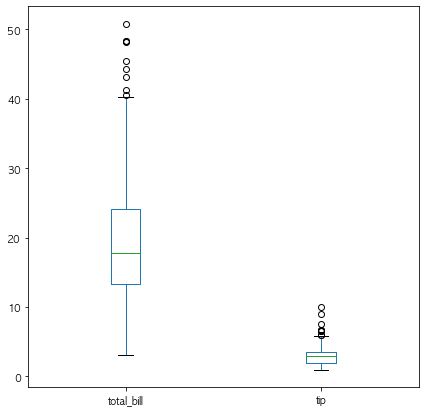

In [20]:
# DataFrame 형태
tips[['total_bill', 'tip']].plot.box(figsize = (7, 7))
# 데이터 프레임 형태로 한 번에 두개이상의 박스플롯을 표현할 수 있다.

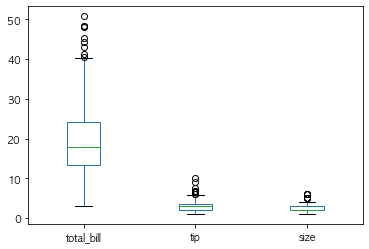

In [21]:
tips.plot.box()

## scatter plot (산점도) 
- Series를 갖고 그릴 수 없다.
- DataFrame만 사용할 수 있다.

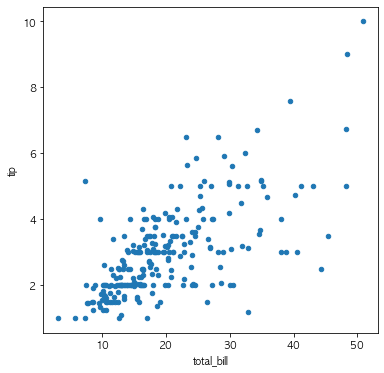

In [22]:
tips.plot(kind = 'scatter', x = 'total_bill', y = 'tip',
          figsize = (6, 6))  # x에 올 컬럼명, y에 올 컬럼명(데이터셋)을 지정해주어야 한다.

In [23]:
tips[['total_bill', 'tip']].corr()  # 상관관계 체크

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


# 파이썬의 날짜 / 시간 다루기
- datetime 모듈
- datetime 클래스 : 날짜 / 시간
- date : 날짜
- time : 시간

In [24]:
import datetime  # 모듈 임포트

In [25]:
c = datetime.datetime.now()  # 현재 날짜, 시간을 datetime객체로 반환
c
# 2021년 3월 11일 15시 53분 32초 819025(초 미만 단위)

datetime.datetime(2021, 3, 11, 17, 17, 9, 563936)

In [26]:
a = datetime.datetime.now()
a - c
# c와 a 사이의 시간이 54초 차이나는 것을 알 수 있다.

datetime.timedelta(0, 0, 345170)

In [27]:
# 특정 일시
date = datetime.datetime(2000, 4, 5)
date

datetime.datetime(2000, 4, 5, 0, 0)

In [28]:
date2 = datetime.datetime(2010, 5, 20, 15, 32, 5)
date2
# 입력 시, 초는 생략할 수 있지만 [년월일시분]까지는 넣어줘야 한다.

datetime.datetime(2010, 5, 20, 15, 32, 5)

In [29]:
date2 = datetime.datetime.now()
days = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}

print(date2.year, date2.month, date2.day, date2.hour, date2.minute, date2.second)
print('요일: ', days[date2.weekday()], '요일, ', date2.weekday())  # 0:월요일 ~ 6:일요일

2021 3 11 17 17 11
요일:  목 요일,  3


In [30]:
date2.isocalendar()  #(년도, 몇주차, 요일) - 1:월요일 ~ 7:일요일

(2021, 10, 4)

In [31]:
# datetime -> 문자열
#datetime.strftime('format문자열')
# %Y: 년도 (4자리)
# %m: 월
# %d: 일
# %H: 시간
# %M: 분
# %S: 초
# 년도를 뺸 월~초의 값들은 모두 2자리 (00의 형태)
# %A: 요일
date2.strftime('%Y/%m/%d/%H:%M:%S, %A')

'2021/03/11/17:17:11, Thursday'

In [32]:
# 문자열 -> datetime
# strptime
d = datetime.datetime.strptime('2020/10/20', '%Y/%m/%d')
d, d.day

(datetime.datetime(2020, 10, 20, 0, 0), 20)

# 판다스에서 datetime 사용

In [33]:
d = [datetime.datetime.now()] * 10
df = pd.DataFrame({
    'age' : np.random.randint(10, 100, 10),
    'day' : d
})
df.shape

(10, 2)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   age     10 non-null     int64         
 1   day     10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 288.0 bytes


In [35]:
df

,age,day
0,80,2021-03-11 17:17:12.781846
1,93,2021-03-11 17:17:12.781846
2,97,2021-03-11 17:17:12.781846
3,34,2021-03-11 17:17:12.781846
4,26,2021-03-11 17:17:12.781846
5,89,2021-03-11 17:17:12.781846
6,79,2021-03-11 17:17:12.781846
7,36,2021-03-11 17:17:12.781846
8,80,2021-03-11 17:17:12.781846
9,26,2021-03-11 17:17:12.781846


df accessor: datetime 타입의 값들을 처리하는 기능을 제공

In [36]:
def a(d):
    return d.year

In [37]:
df['day'].apply(a)

0    2021
1    2021
2    2021
3    2021
4    2021
5    2021
6    2021
7    2021
8    2021
9    2021
Name: day, dtype: int64

In [38]:
# Series 타입: datetime64
df['day'].dt.year  # 원소별로 원하는 날짜, 시간에서 원하는 항목들을 추출할 수 있다.

0    2021
1    2021
2    2021
3    2021
4    2021
5    2021
6    2021
7    2021
8    2021
9    2021
Name: day, dtype: int64

In [39]:
df['day'].dt.month

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: day, dtype: int64

In [40]:
# day: 일
# hour: 시간
# minute: 분
# second: 초
# week: 주 (일년 중에 몇번째 주인지 == 위에서의 weekday)
# dayofweek: 요일 (0:월 ~ 6:일)
# dayofyear: 일년 중에 몇번째 일인지
# isocalendar(): (년, 주차, 요일) 반환 (1:월 ~ 7:일) -> DataFrame 형태로 반환
df['day'].dt.hour
df['day'].dt.dayofweek

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: day, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   age     10 non-null     int64         
 1   day     10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 288.0 bytes


In [42]:
df['day'].dt.isocalendar()

,year,week,day
0,2021,10,4
1,2021,10,4
2,2021,10,4
3,2021,10,4
4,2021,10,4
5,2021,10,4
6,2021,10,4
7,2021,10,4
8,2021,10,4
9,2021,10,4


In [ ]:
df.groupby('day')['월'] = 

# datetime 타입의 index를 생성
- pd.date_range(시작날짜, freq = '변화규칙', periods = '개수') -> 규칙적으로 증가,감소하는 datetime값을 가지는 index를 생성

In [114]:
pd.date_range('2020/1/1', freq = 'M', periods = 5)  # 2020/1/1부터 1개월씩 증가하는 날짜 5개를 생성
# freq = 'M'의 경우, 각 월의 마지막 날짜가 나온다.

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31'],
              dtype='datetime64[ns]', freq='M')

In [115]:
pd.date_range('2020/1/1', freq = 'MS', periods = 5)
# freq = 'MS'의 경우, 각 월의 첫번째 날짜가 나온다.

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [116]:
pd.date_range('2020/1/1', freq = 'Y', periods = 5)
# freq = 'Y'의 경우, 그 해의 마지막 날짜가 나온다.

DatetimeIndex(['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [117]:
pd.date_range('2020/1/1', freq = 'YS', periods = 5)
# freq = 'YS'의 경우, 그 해의 첫 번째 날짜가 나온다.

DatetimeIndex(['2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01',
               '2024-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [118]:
# freq - 간격을 지정(Y:년, M:월, D:일, H:시간, T:분, S:초)
#        (-S: 첫 번째 날짜 / 시간, S 생략: 마지막 날짜 / 시간)

In [119]:
pd.date_range('2020/1/1', freq = '5D', periods = 5)
# freq 앞에 숫자를 붙이면 그 숫자만큼의 간격으로 표현

DatetimeIndex(['2020-01-01', '2020-01-06', '2020-01-11', '2020-01-16',
               '2020-01-21'],
              dtype='datetime64[ns]', freq='5D')

In [121]:
pd.date_range('2020/1/1', freq = '3Y', periods = 5)

DatetimeIndex(['2020-12-31', '2023-12-31', '2026-12-31', '2029-12-31',
               '2032-12-31'],
              dtype='datetime64[ns]', freq='3A-DEC')

In [5]:
value = np.round(np.random.normal(5, 3, size = (10, 3)), 2)
index = pd.date_range('2020/1/1', freq = 'M', periods = 10)
df = pd.DataFrame(value, index = index, columns = ['no1', 'no2', 'no3'])
df

,no1,no2,no3
2020-01-31,3.36,7.13,6.61
2020-02-29,7.28,5.55,4.35
2020-03-31,5.56,-3.25,6.06
2020-04-30,7.82,5.23,-0.71
2020-05-31,7.63,2.22,3.99
2020-06-30,5.23,11.30,4.51
2020-07-31,8.77,9.86,8.61
2020-08-31,3.24,3.63,2.51
2020-09-30,6.31,7.60,7.37
2020-10-31,3.95,1.53,3.23


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2020-01-31 to 2020-10-31
Freq: M
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no1     10 non-null     float64
 1   no2     10 non-null     float64
 2   no3     10 non-null     float64
dtypes: float64(3)
memory usage: 320.0 bytes


## Line Plot

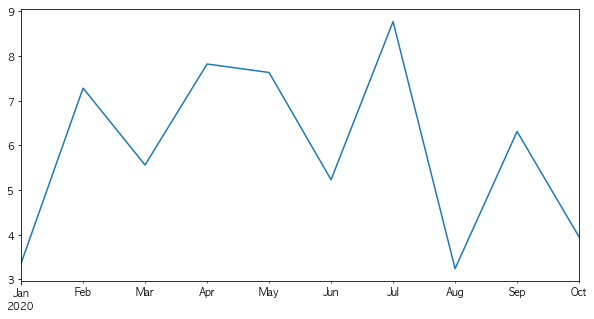

In [9]:
# Series
#df['no1'].plot(kind = 'line', figsize = (10, 5))
df['no1'].plot(figsize = (10, 5))  # kind의 default값은 line
plt.show()

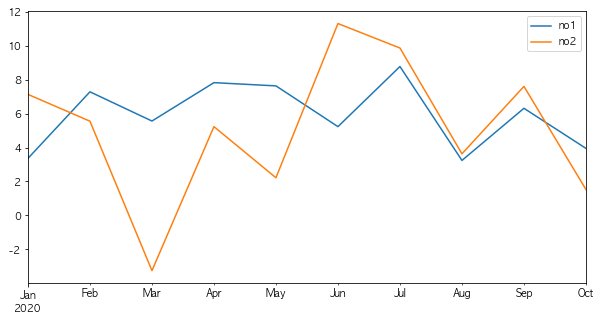

In [17]:
# DataFrame - X-index, Y-숫자형 컬럼들 - 컬럼별로 선그래프를 각각 그려준다.
df[['no1', 'no2']].plot(figsize = (10, 5))
plt.show()

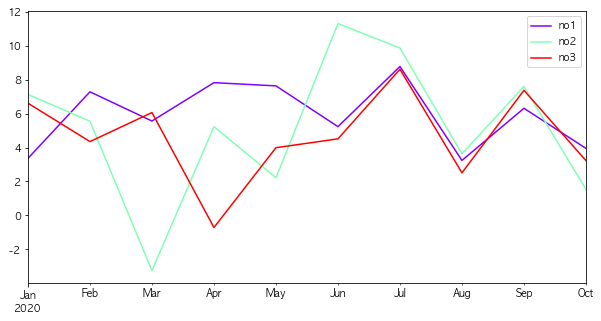

In [15]:
df.plot(figsize = (10, 5), cmap = 'rainbow')
plt.show()

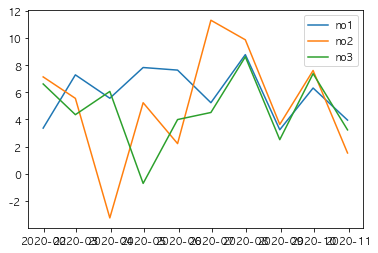

In [13]:
# plt로 구현할 경우
plt.plot(df['no1'], label = 'no1')
plt.plot(df['no2'], label = 'no2')
plt.plot(df['no3'], label = 'no3')
plt.legend()
plt.show()

In [19]:
df['cumsum'] = df['no1'].cumsum()  # 누적합계
df

,no1,no2,no3,cumsum
2020-01-31,3.36,7.13,6.61,3.36
2020-02-29,7.28,5.55,4.35,10.64
2020-03-31,5.56,-3.25,6.06,16.20
2020-04-30,7.82,5.23,-0.71,24.02
2020-05-31,7.63,2.22,3.99,31.65
2020-06-30,5.23,11.30,4.51,36.88
2020-07-31,8.77,9.86,8.61,45.65
2020-08-31,3.24,3.63,2.51,48.89
2020-09-30,6.31,7.60,7.37,55.20
2020-10-31,3.95,1.53,3.23,59.15


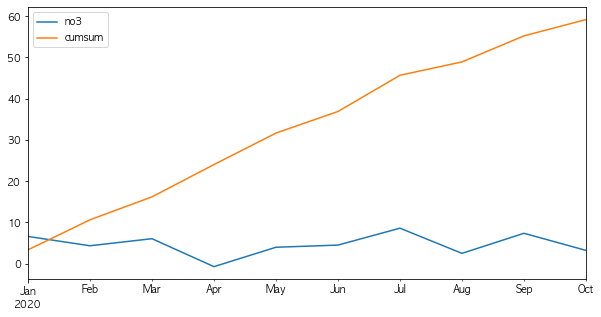

In [20]:
df[['no3', 'cumsum']].plot(figsize = (10, 5))
plt.show()